In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [715]:
file = pd.read_csv("Technical exam data.csv")
print(file)

        POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  \
0            97662795  01-APR-16            4  01-OCT-16        1   
1           100915150  01-DEC-16           12  01-DEC-16        1   
2            99747655  01-OCT-16           10  01-MAR-17        1   
3            99406855  01-SEP-16            9  01-JAN-17        1   
4           102166525  01-JAN-17            1  01-FEB-17        2   
...               ...        ...          ...        ...      ...   
303230       90712945  01-JUL-15            7  01-JUL-15        6   
303231       92341770  01-OCT-15           10  01-OCT-15        1   
303232      104189950  01-JUL-17            7  01-APR-18        2   
303233       89534900  01-APR-15            4  01-APR-15        2   
303234       98961920  01-AUG-16            8  01-AUG-16        4   

        MAX_DURATION STATE CARRIER_NAME  
0                184    AZ     CARRIER2  
1                180    OR     CARRIER1  
2                180    NC     CARRIER3  
3  

In [176]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   POLICY_NUMBER  303235 non-null  int64 
 1   START_DATE     303235 non-null  object
 2   START_MONTH    303235 non-null  int64 
 3   CHURN_DATE     303235 non-null  object
 4   MEMBERS        303235 non-null  int64 
 5   MAX_DURATION   303235 non-null  int64 
 6   STATE          303235 non-null  object
 7   CARRIER_NAME   303235 non-null  object
dtypes: int64(4), object(4)
memory usage: 18.5+ MB
None


In [177]:
policy_no = file[["POLICY_NUMBER"]]
policy_no_1 = policy_no.count().reset_index(name = "policy_no_count")
policy_no_2 = policy_no_1[["policy_no_count"]]

print(policy_no_2)



   policy_no_count
0           303235


In [178]:
# Create a column : END_MONTH

file["END_MONTH"] = pd.DatetimeIndex(file['CHURN_DATE']).month

print(file)

        POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  \
0            97662795  01-APR-16            4  01-OCT-16        1   
1           100915150  01-DEC-16           12  01-DEC-16        1   
2            99747655  01-OCT-16           10  01-MAR-17        1   
3            99406855  01-SEP-16            9  01-JAN-17        1   
4           102166525  01-JAN-17            1  01-FEB-17        2   
...               ...        ...          ...        ...      ...   
303230       90712945  01-JUL-15            7  01-JUL-15        6   
303231       92341770  01-OCT-15           10  01-OCT-15        1   
303232      104189950  01-JUL-17            7  01-APR-18        2   
303233       89534900  01-APR-15            4  01-APR-15        2   
303234       98961920  01-AUG-16            8  01-AUG-16        4   

        MAX_DURATION STATE CARRIER_NAME  END_MONTH  
0                184    AZ     CARRIER2         10  
1                180    OR     CARRIER1         12  
2           

In [74]:
edit = file[["POLICY_NUMBER", "MAX_DURATION", "STATE", "CARRIER_NAME", "MEMBERS"]]
print(edit)
print(edit.info())

edit.duplicated(keep=False) # duplicated rows checkpoint

# file_2.groupby(["Department"])["UPC"].count().reset_index(name="Count").sort_values("Count",ascending = False)

# What carrier has the highest number of members covered under the policy?

# Note) MEMBERS: This variable represents the number of members covered under the policy. 
#                It is possible that policies with more members are more likely to be retained for a longer period of time, 
#                perhaps because it is more difficult for members to find alternative coverage for a larger group.


ds_1 = edit.groupby(["CARRIER_NAME"])["MEMBERS"].sum().reset_index(name = "member_sum").sort_values("member_sum", ascending = False)

# group by carrier & states

ds_2 = edit.groupby(["CARRIER_NAME", "STATE"])["MEMBERS"].sum().reset_index(name = "member_sum").sort_values("member_sum", ascending = False)


print(ds_1)
print(ds_2)

# This outcome does not tell you that those variable have impacts on the length of member lifetime.

# use groupby function based on at cohort level (members)


        POLICY_NUMBER  MAX_DURATION STATE CARRIER_NAME  MEMBERS
0            97662795           184    AZ     CARRIER2        1
1           100915150           180    OR     CARRIER1        1
2            99747655           180    NC     CARRIER3        1
3            99406855           180    AK     CARRIER3        1
4           102166525           184    AZ     CARRIER2        2
...               ...           ...   ...          ...      ...
303230       90712945           180    FL     CARRIER1        6
303231       92341770           180    TX     CARRIER1        1
303232      104189950            90    WA     CARRIER7        2
303233       89534900           180    AZ     CARRIER2        2
303234       98961920           180    NH     CARRIER1        4

[303235 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   PO

   MEMBERS  duration_avg
7        8    188.169014
4        5    184.856407
2        3    184.539521
1        2    184.472468
3        4    184.438071
6        7    184.284281
5        6    182.827027
0        1    182.117246
8        9    168.318182
9       10    166.166667


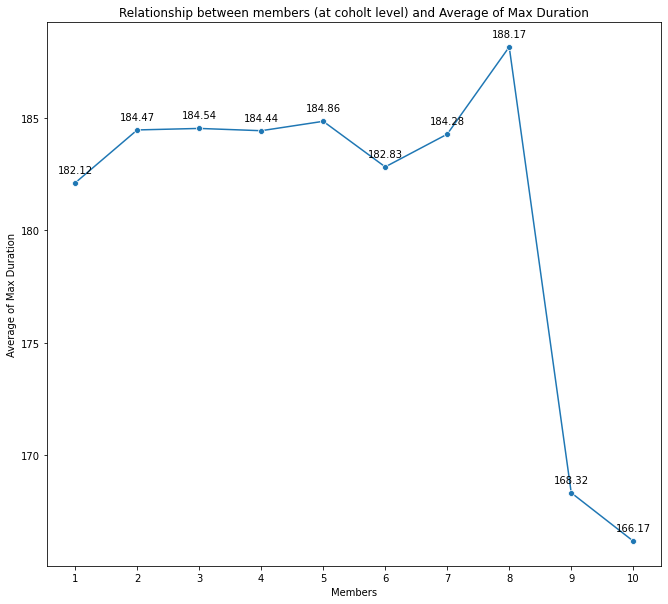

In [71]:
ds_3 = edit.groupby(["MEMBERS"])["MAX_DURATION"].mean().reset_index(name = "duration_avg").sort_values("duration_avg", ascending = False)

print(ds_3)


plt.figure(figsize=(11,10))

sns.lineplot(x='MEMBERS', y="duration_avg", data = ds_3, marker = 'o', )

plt.title("Relationship between members (at coholt level) and Average of Max Duration")
plt.xlabel("Members")
plt.ylabel("Average of Max Duration")

plt.xticks(range(1, 11, 1))

for x,y in zip(ds_3['MEMBERS'], ds_3['duration_avg']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

        POLICY_NUMBER  MAX_DURATION STATE CARRIER_NAME  MEMBERS
0            97662795           184    AZ     CARRIER2        1
1           100915150           180    OR     CARRIER1        1
2            99747655           180    NC     CARRIER3        1
3            99406855           180    AK     CARRIER3        1
4           102166525           184    AZ     CARRIER2        2
...               ...           ...   ...          ...      ...
303230       90712945           180    FL     CARRIER1        6
303231       92341770           180    TX     CARRIER1        1
303232      104189950            90    WA     CARRIER7        2
303233       89534900           180    AZ     CARRIER2        2
303234       98961920           180    NH     CARRIER1        4

[303235 rows x 5 columns]
315.0
-45.0
        POLICY_NUMBER  MAX_DURATION STATE CARRIER_NAME  MEMBERS
0            97662795           184    AZ     CARRIER2        1
1           100915150           180    OR     CARRIER1        1
2

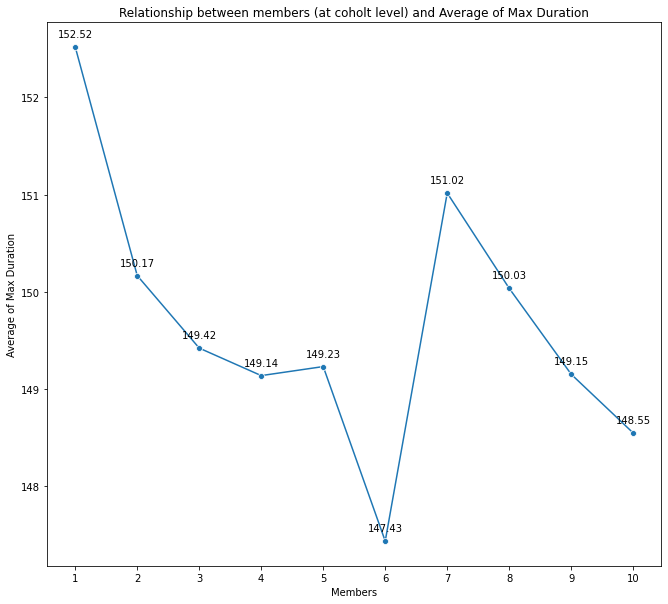

In [73]:
# WHAT IF? there are a couple outliers in the dataset.
# - Median value seems not to be feasible in this dataset because all results will be set as 180.00 at all number of members
# - Why don't we use the quartile method to filter out some values below quaritle minimum and above quartile maximum of max duration?

print(edit)

qt_25 = np.percentile(edit["MAX_DURATION"], 25)
qt_75 = np.percentile(edit["MAX_DURATION"], 75)

qt_max = qt_75 + (qt_75 - qt_25) * 1.5 
qt_min = qt_25 - (qt_75 - qt_25) * 1.5

print(qt_max)
print(qt_min)

test = edit[edit["MAX_DURATION"] > qt_max]

edit_2 = edit[edit["MAX_DURATION"] < qt_max]

print(edit_2)

ds_4 = edit_2.groupby(["MEMBERS"])["MAX_DURATION"].mean().reset_index(name = "duration_avg").sort_values("duration_avg", ascending = False)

print(ds_4)


plt.figure(figsize=(11,10))

sns.lineplot(x='MEMBERS', y="duration_avg", data = ds_4, marker = 'o', )

plt.title("Relationship between members (at coholt level) and Average of Max Duration")
plt.xlabel("Members")
plt.ylabel("Average of Max Duration")

plt.xticks(range(1, 11, 1))

for x,y in zip(ds_4['MEMBERS'], ds_4['duration_avg']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    

# Why does quartile method not seem to be feasible for this case?

# 1 -- Outliers: The quartile method uses the interquartile range (IQR) to 
#                define the boundaries for identifying outliers, which are defined as values that fall outside 
#                the range Q1 - 1.5 x IQR to Q3 + 1.5 x IQR. 
#                However, if there are extreme values in the data that fall outside this range, 
#                the quartile method may not accurately represent the central tendency or variability of the data. 

# 2 -- Small sample sizes: The quartile method may not be suitable for small sample sizes, as the quartile boundaries 
#      may be less stable and less representative of the population from which the data was drawn. 
#      -> 303235 observations are still too small for filtering outliers by using the quartile method. 

   STATE  total_members
40    TX          52285
4     CA          31936
9     FL          31395
10    GA          25036
14    IL          21744


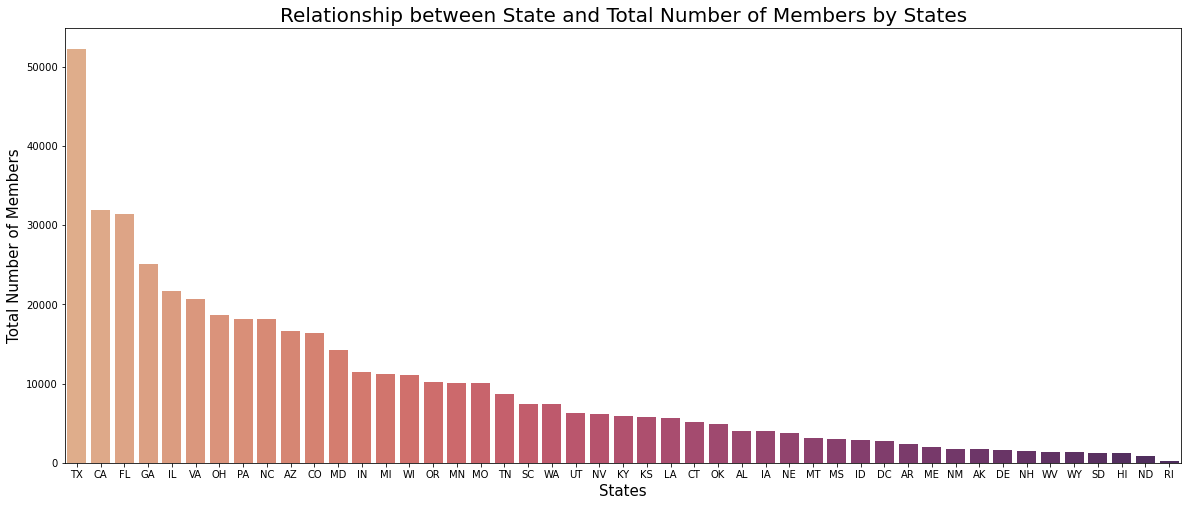

In [144]:
# I would like to find another way to find some impact on the length of member lifetime.
# group by state 

ds_5_1 = edit.groupby(["STATE"])["MEMBERS"].sum().reset_index(name = "total_members").sort_values("total_members", ascending = False)
print(ds_5_1.head(5))


fig, ax = plt.subplots(figsize = (20, 8))

# Plot the column graph on the left axis

ax.set_xlabel("STATES")
ax.set_ylabel("Average of Max Duration")

sns.barplot(x = "STATE", y = "total_members", palette = "flare",
           data = ds_5_1)

# Add a title and legend

ax.set_title('Relationship between State and Total Number of Members by States', fontsize = 20)
ax.set_xlabel("States", fontsize = 15)
ax.set_ylabel("Total Number of Members", fontsize = 15)

plt.show()

# the highest total number of policyholders was in Texas between Jan 2015 to Dec 2019


In [409]:
print(file.info())

# Subtract Start date from Churn date

file['START_DATE_1'] = pd.to_datetime(file['START_DATE'])
file['CHURN_DATE_1'] = pd.to_datetime(file['CHURN_DATE'])


file['TENURE_DATE'] =  file["CHURN_DATE_1"] - file["START_DATE_1"]


file_1 = file.drop(["START_DATE", "CHURN_DATE"], axis = 1)
file_1 = file_1.rename(columns={'START_DATE_1' : 'START_DATE', 'CHURN_DATE_1' : 'CHURN_DATE'})

file_1['TENURE_DATE'] = file_1['TENURE_DATE'].dt.days

print(file_1.info())


# year column

file_1["START_YEAR"] = pd.DatetimeIndex(file["START_DATE"]).year

print(file_1.info())

print(file_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   POLICY_NUMBER  303235 non-null  int64          
 1   START_DATE     303235 non-null  object         
 2   START_MONTH    303235 non-null  int64          
 3   CHURN_DATE     303235 non-null  object         
 4   MEMBERS        303235 non-null  int64          
 5   MAX_DURATION   303235 non-null  int64          
 6   STATE          303235 non-null  object         
 7   CARRIER_NAME   303235 non-null  object         
 8   END_MONTH      303235 non-null  int64          
 9   START_DATE_1   303235 non-null  datetime64[ns] 
 10  CHURN_DATE_1   303235 non-null  datetime64[ns] 
 11  TENURE_DATE    303235 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(5), object(4), timedelta64[ns](1)
memory usage: 27.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30

In [362]:
print(file_1.info())


dset_1 = file_1.groupby(["START_YEAR","START_MONTH","STATE","CARRIER_NAME"])["TENURE_DATE"].mean().reset_index(name="AVG_TENURE_DATE")\
.sort_values("AVG_TENURE_DATE", ascending = False)

dset_1['AVG_TENURE_DATE'] = dset_1['AVG_TENURE_DATE'].dt.days

dset_2 = dset_1.copy() 

''' Why does the churn rate is greater than the start date?

Per my research...

it's common to calculate the lifetime or duration of the policy based on the time between the start_date and churn_date, 
rather than assuming that the policy was in effect until the end of the year or some other fixed time period. 
This ensures that the calculated tenure is accurate and reflects the actual time period during which the policy was in effect.

Should we get rid of those cases from the dataset?

No, those data are still valuable to measure the customer's preference for the service selection.

'''

pivot_1 = pd.pivot_table(dset_2, values='AVG_TENURE_DATE', index='STATE', columns='START_YEAR', aggfunc='mean')

print(pivot_1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   POLICY_NUMBER  303235 non-null  int64          
 1   START_MONTH    303235 non-null  int64          
 2   MEMBERS        303235 non-null  int64          
 3   MAX_DURATION   303235 non-null  int64          
 4   STATE          303235 non-null  object         
 5   CARRIER_NAME   303235 non-null  object         
 6   END_MONTH      303235 non-null  int64          
 7   START_DATE     303235 non-null  datetime64[ns] 
 8   CHURN_DATE     303235 non-null  datetime64[ns] 
 9   TENURE_DATE    303235 non-null  timedelta64[ns]
 10  START_YEAR     303235 non-null  int64          
dtypes: datetime64[ns](2), int64(6), object(2), timedelta64[ns](1)
memory usage: 25.4+ MB
None
START_YEAR        2015        2016        2017        2018        2019
STATE                             

    START_YEAR  START_MONTH  AVG_TENURE_DATE YEAR-MONTH
0         2015            1        54.542484 2015-01-01
1         2015            2        75.730263 2015-02-01
2         2015            3        83.603896 2015-03-01
3         2015            4        80.278912 2015-04-01
4         2015            5        86.368794 2015-05-01
5         2015            6        93.150327 2015-06-01
6         2015            7        86.095238 2015-07-01
7         2015            8        83.615894 2015-08-01
8         2015            9        87.673469 2015-09-01
9         2015           10        97.554140 2015-10-01
10        2015           11        67.787097 2015-11-01
11        2015           12        81.450331 2015-12-01
12        2016            1        88.493671 2016-01-01
13        2016            2       110.238095 2016-02-01
14        2016            3       120.628049 2016-03-01
15        2016            4       120.721212 2016-04-01
16        2016            5       117.391566 201

Text(0, 0.5, 'AVG COHORT LIFTIME')

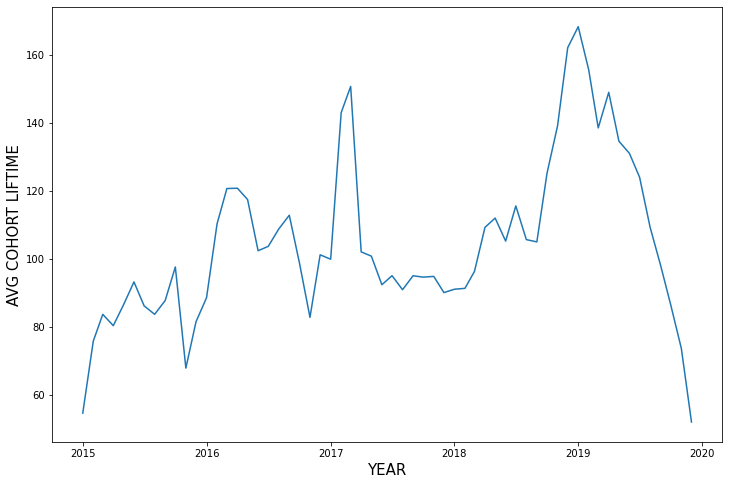

In [1090]:
# by year & month

dset_3 = dset_2.groupby(["START_YEAR", "START_MONTH"])["AVG_TENURE_DATE"].mean().reset_index(name = "AVG_TENURE_DATE").sort_values("AVG_TENURE_DATE", ascending = False)

dset_3["YEAR-MONTH"] = dset_3["YEAR-MONTH"] = dset_3["START_MONTH"].astype(str) + "-" + dset_3["START_YEAR"].astype(str) 

dset_3["YEAR-MONTH"] = pd.to_datetime(dset_3["YEAR-MONTH"], format="%m-%Y")

dset_4 = dset_3.copy()

dset_4_1 = dset_4.sort_values("YEAR-MONTH", ascending = True)

print(dset_4_1)

fig, ax = plt.subplots(figsize = (12, 8))

plt.plot("YEAR-MONTH", "AVG_TENURE_DATE", data = dset_4_1)

ax.set_xlabel("YEAR", fontsize = 15)
ax.set_ylabel("AVG COHORT LIFTIME", fontsize = 15)

     START_YEAR STATE  AVG_TENURE_DATE
208        2019    ND       306.000000
106        2017    ID       196.928571
152        2018    ID       191.580645
150        2018    HI       171.952381
131        2017    TN       166.970588


Text(0, 0.5, 'AVG COHORT LIFETIME')

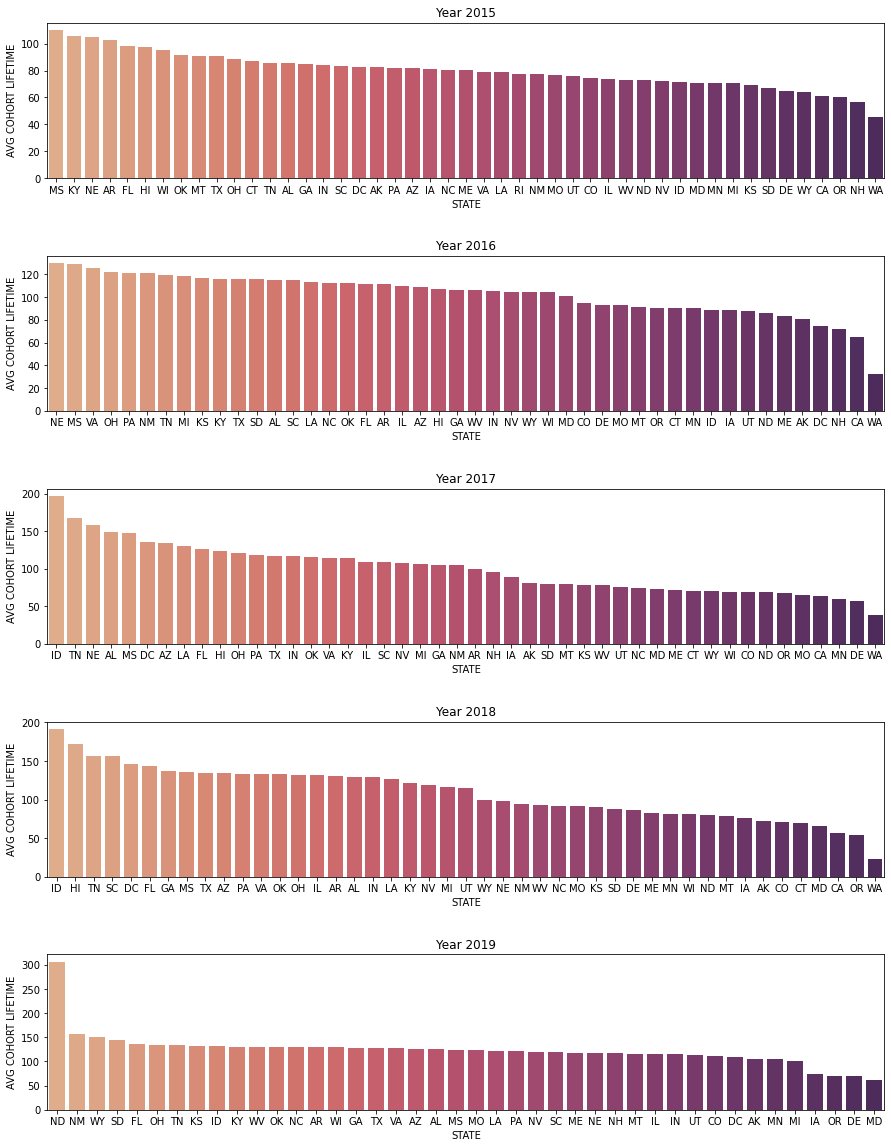

In [1091]:
dset_5 = dset_2.groupby(["START_YEAR", "STATE"])["AVG_TENURE_DATE"].mean().reset_index(name = "AVG_TENURE_DATE").sort_values("AVG_TENURE_DATE", ascending = False)

print(dset_5.head())

#filter by years

dset_5_2015 = dset_5[dset_5["START_YEAR"] == 2015].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2016 = dset_5[dset_5["START_YEAR"] == 2016].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2017 = dset_5[dset_5["START_YEAR"] == 2017].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2018 = dset_5[dset_5["START_YEAR"] == 2018].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2019 = dset_5[dset_5["START_YEAR"] == 2019].sort_values("AVG_TENURE_DATE", ascending = False)

fig, axes = plt.subplots(5, 1, figsize = (15, 20))
fig.subplots_adjust(hspace=0.5)


sns.barplot(x="STATE", y="AVG_TENURE_DATE", data=dset_5_2015, ax=axes[0], palette = "flare")



sns.barplot(x="STATE", y="AVG_TENURE_DATE", data=dset_5_2016, ax=axes[1], palette = "flare")
sns.barplot(x="STATE", y="AVG_TENURE_DATE", data=dset_5_2017, ax=axes[2], palette = "flare")
sns.barplot(x="STATE", y="AVG_TENURE_DATE", data=dset_5_2018, ax=axes[3], palette = "flare")
sns.barplot(x="STATE", y="AVG_TENURE_DATE", data=dset_5_2019, ax=axes[4], palette = "flare")


axes[0].set_title("Year 2015")
axes[0].set_xlabel("STATE")
axes[0].set_ylabel("AVG COHORT LIFETIME")


axes[1].set_title("Year 2016")
axes[1].set_xlabel("STATE")
axes[1].set_ylabel("AVG COHORT LIFETIME")

axes[2].set_title("Year 2017")
axes[2].set_xlabel("STATE")
axes[2].set_ylabel("AVG COHORT LIFETIME")

axes[3].set_title("Year 2018")
axes[3].set_xlabel("STATE")
axes[3].set_ylabel("AVG COHORT LIFETIME")

axes[4].set_title("Year 2019")
axes[4].set_xlabel("STATE")
axes[4].set_ylabel("AVG COHORT LIFETIME")


    START_YEAR CARRIER_NAME  AVG_TENURE_DATE
25        2018    CARRIER11       269.384615
32        2019    CARRIER11       226.528302
22        2017     CARRIER4       220.635371
28        2018     CARRIER4       207.383073
17        2016     CARRIER4       171.431235


Text(0, 0.5, 'AVG COHORT LIFTIME')

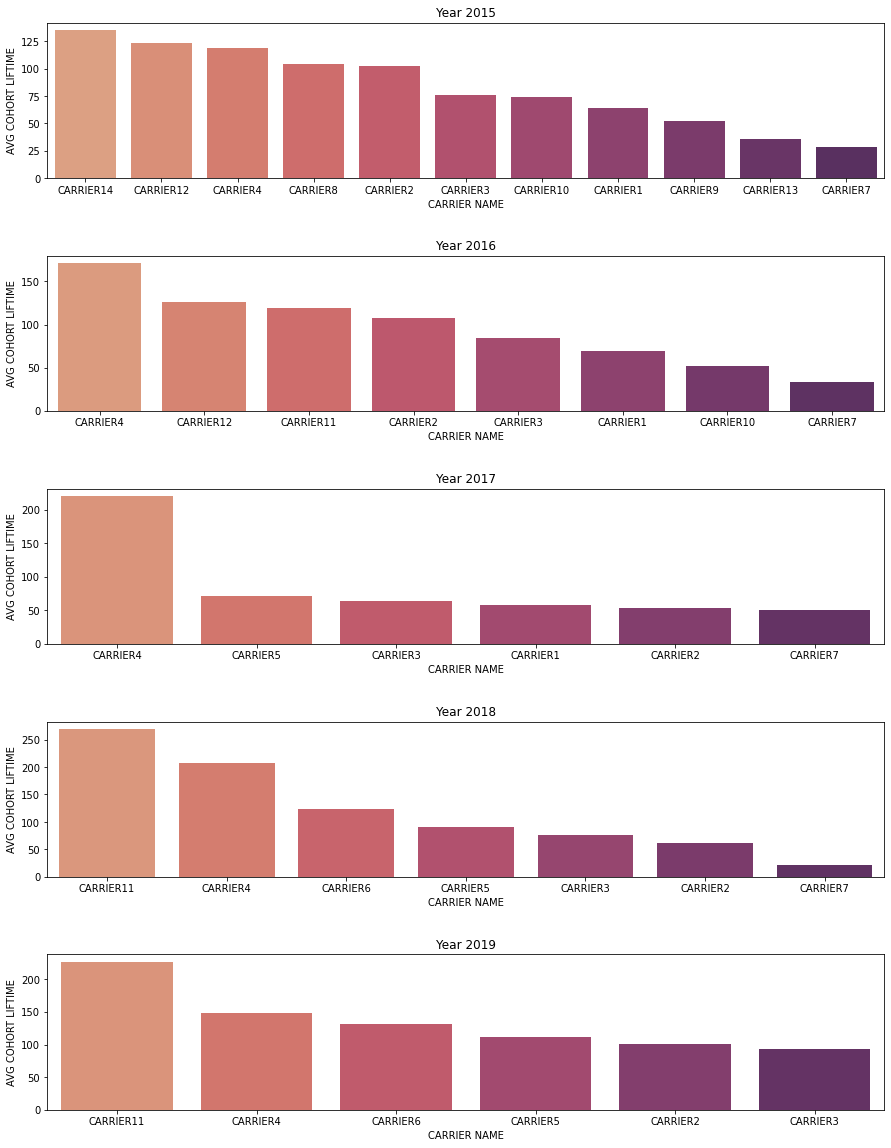

In [1092]:
# by carrier

dset_6 = dset_2.groupby(["START_YEAR", "CARRIER_NAME"])["AVG_TENURE_DATE"].mean().reset_index(name = "AVG_TENURE_DATE").sort_values("AVG_TENURE_DATE", ascending = False)

print(dset_6.head())

#filter by years

dset_6_2015 = dset_6[dset_6["START_YEAR"] == 2015].sort_values("AVG_TENURE_DATE", ascending = False)
dset_6_2016 = dset_6[dset_6["START_YEAR"] == 2016].sort_values("AVG_TENURE_DATE", ascending = False)
dset_6_2017 = dset_6[dset_6["START_YEAR"] == 2017].sort_values("AVG_TENURE_DATE", ascending = False)
dset_6_2018 = dset_6[dset_6["START_YEAR"] == 2018].sort_values("AVG_TENURE_DATE", ascending = False)
dset_6_2019 = dset_6[dset_6["START_YEAR"] == 2019].sort_values("AVG_TENURE_DATE", ascending = False)

fig, axes = plt.subplots(5, 1, figsize = (15, 20))
fig.subplots_adjust(hspace=0.5)


sns.barplot(x="CARRIER_NAME", y="AVG_TENURE_DATE", data=dset_6_2015, ax=axes[0], palette = "flare")



sns.barplot(x="CARRIER_NAME", y="AVG_TENURE_DATE", data=dset_6_2016, ax=axes[1], palette = "flare")
sns.barplot(x="CARRIER_NAME", y="AVG_TENURE_DATE", data=dset_6_2017, ax=axes[2], palette = "flare")
sns.barplot(x="CARRIER_NAME", y="AVG_TENURE_DATE", data=dset_6_2018, ax=axes[3], palette = "flare")
sns.barplot(x="CARRIER_NAME", y="AVG_TENURE_DATE", data=dset_6_2019, ax=axes[4], palette = "flare")


axes[0].set_title("Year 2015")
axes[0].set_xlabel("CARRIER NAME")
axes[0].set_ylabel("AVG COHORT LIFTIME")


axes[1].set_title("Year 2016")
axes[1].set_xlabel("CARRIER NAME")
axes[1].set_ylabel("AVG COHORT LIFTIME")

axes[2].set_title("Year 2017")
axes[2].set_xlabel("CARRIER NAME")
axes[2].set_ylabel("AVG COHORT LIFTIME")

axes[3].set_title("Year 2018")
axes[3].set_xlabel("CARRIER NAME")
axes[3].set_ylabel("AVG COHORT LIFTIME")

axes[4].set_title("Year 2019")
axes[4].set_xlabel("CARRIER NAME")
axes[4].set_ylabel("AVG COHORT LIFTIME")

    START_YEAR  START_MONTH  AVG_TENURE_DATE
48        2019            1       168.251462
47        2018           12       162.071429
49        2019            2       155.513889
26        2017            3       150.677852
51        2019            4       148.942446


Text(0, 0.5, 'AVG COHORT LIFTIME')

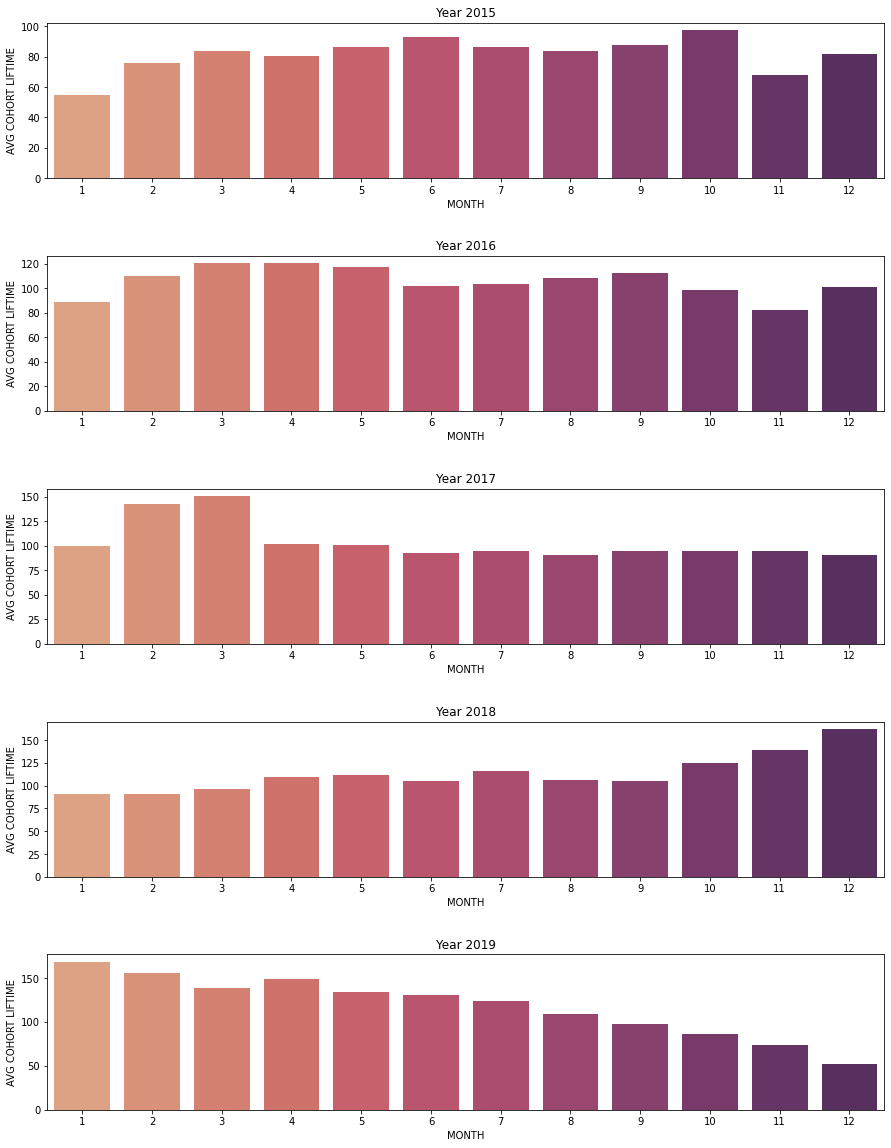

In [1093]:
# by months

dset_5 = dset_2.groupby(["START_YEAR", "START_MONTH"])["AVG_TENURE_DATE"].mean().reset_index(name = "AVG_TENURE_DATE").sort_values("AVG_TENURE_DATE", ascending = False)

print(dset_5.head())

#filter by years

dset_5_2015 = dset_5[dset_5["START_YEAR"] == 2015].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2016 = dset_5[dset_5["START_YEAR"] == 2016].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2017 = dset_5[dset_5["START_YEAR"] == 2017].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2018 = dset_5[dset_5["START_YEAR"] == 2018].sort_values("AVG_TENURE_DATE", ascending = False)
dset_5_2019 = dset_5[dset_5["START_YEAR"] == 2019].sort_values("AVG_TENURE_DATE", ascending = False)

fig, axes = plt.subplots(5, 1, figsize = (15, 20))
fig.subplots_adjust(hspace=0.5)


sns.barplot(x="START_MONTH", y="AVG_TENURE_DATE", data=dset_5_2015, ax=axes[0], palette = "flare")



sns.barplot(x="START_MONTH", y="AVG_TENURE_DATE", data=dset_5_2016, ax=axes[1], palette = "flare")
sns.barplot(x="START_MONTH", y="AVG_TENURE_DATE", data=dset_5_2017, ax=axes[2], palette = "flare")
sns.barplot(x="START_MONTH", y="AVG_TENURE_DATE", data=dset_5_2018, ax=axes[3], palette = "flare")
sns.barplot(x="START_MONTH", y="AVG_TENURE_DATE", data=dset_5_2019, ax=axes[4], palette = "flare")


axes[0].set_title("Year 2015")
axes[0].set_xlabel("MONTH")
axes[0].set_ylabel("AVG COHORT LIFTIME")


axes[1].set_title("Year 2016")
axes[1].set_xlabel("MONTH")
axes[1].set_ylabel("AVG COHORT LIFTIME")

axes[2].set_title("Year 2017")
axes[2].set_xlabel("MONTH")
axes[2].set_ylabel("AVG COHORT LIFTIME")

axes[3].set_title("Year 2018")
axes[3].set_xlabel("MONTH")
axes[3].set_ylabel("AVG COHORT LIFTIME")

axes[4].set_title("Year 2019")
axes[4].set_xlabel("MONTH")
axes[4].set_ylabel("AVG COHORT LIFTIME")

    START_YEAR  START_MONTH  AVG_TENURE_DATE
48        2019            1       168.251462
47        2018           12       162.071429
49        2019            2       155.513889
26        2017            3       150.677852
51        2019            4       148.942446


Text(0, 0.5, 'AVG COHORT LIFTIME')

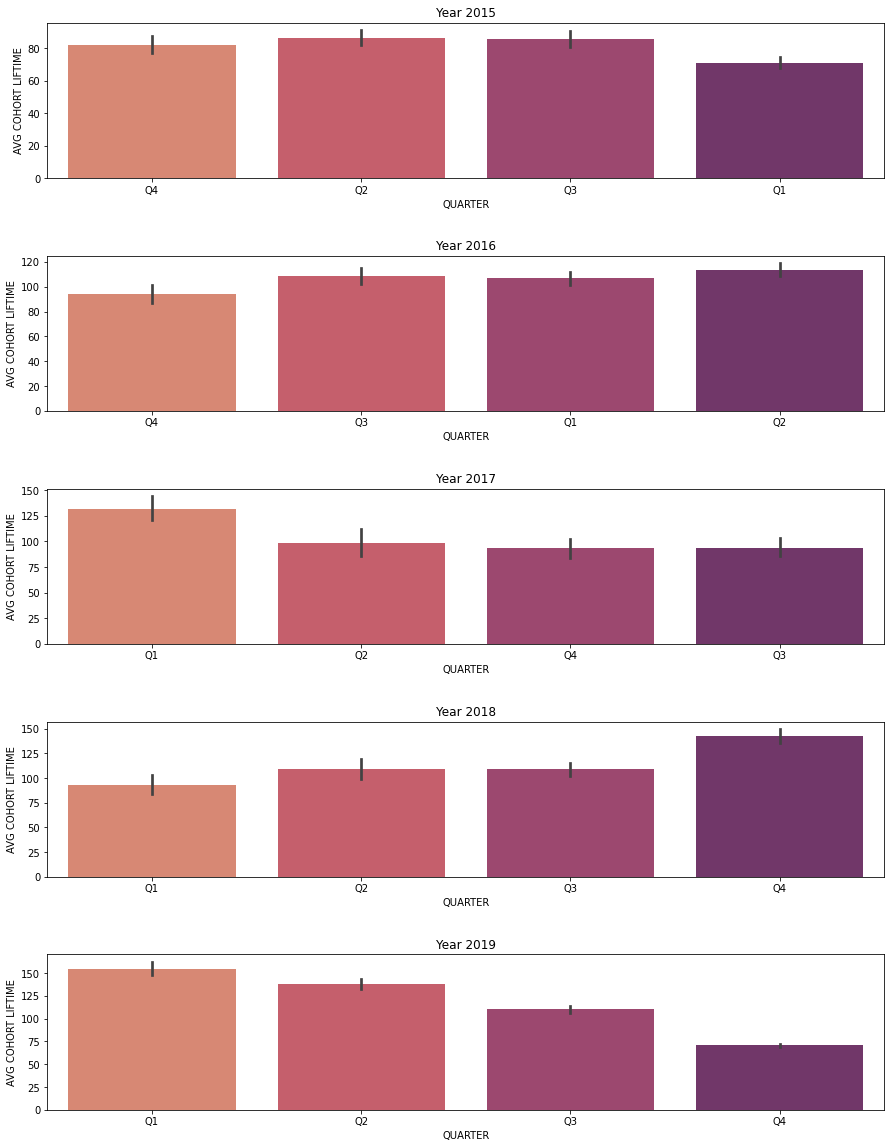

In [1095]:
# Quarterly

dset_2.loc[dset_2['START_MONTH'].isin([1,2,3]), "QUARTER"] = "Q1"
dset_2.loc[dset_2['START_MONTH'].isin([4,5,6]), "QUARTER"] = "Q2"
dset_2.loc[dset_2['START_MONTH'].isin([7,8,9]), "QUARTER"] = "Q3"
dset_2.loc[dset_2['START_MONTH'].isin([10,11,12]), "QUARTER"] = "Q4"

dset_8 = dset_2.groupby(["START_YEAR", "QUARTER"])["AVG_TENURE_DATE"].mean().reset_index(name = "AVG_TENURE_DATE").sort_values("AVG_TENURE_DATE", ascending = False)

print(dset_5.head())

#filter by years

dset_8_2015 = dset_2[dset_2["START_YEAR"] == 2015].sort_values("AVG_TENURE_DATE", ascending = False)
dset_8_2016 = dset_2[dset_2["START_YEAR"] == 2016].sort_values("AVG_TENURE_DATE", ascending = False)
dset_8_2017 = dset_2[dset_2["START_YEAR"] == 2017].sort_values("AVG_TENURE_DATE", ascending = False)
dset_8_2018 = dset_2[dset_2["START_YEAR"] == 2018].sort_values("AVG_TENURE_DATE", ascending = False)
dset_8_2019 = dset_2[dset_2["START_YEAR"] == 2019].sort_values("AVG_TENURE_DATE", ascending = False)

fig, axes = plt.subplots(5, 1, figsize = (15, 20))
fig.subplots_adjust(hspace=0.5)


sns.barplot(x="QUARTER", y="AVG_TENURE_DATE", data=dset_8_2015, ax=axes[0], palette = "flare")



sns.barplot(x="QUARTER", y="AVG_TENURE_DATE", data=dset_8_2016, ax=axes[1], palette = "flare")
sns.barplot(x="QUARTER", y="AVG_TENURE_DATE", data=dset_8_2017, ax=axes[2], palette = "flare")
sns.barplot(x="QUARTER", y="AVG_TENURE_DATE", data=dset_8_2018, ax=axes[3], palette = "flare")
sns.barplot(x="QUARTER", y="AVG_TENURE_DATE", data=dset_8_2019, ax=axes[4], palette = "flare")


axes[0].set_title("Year 2015")
axes[0].set_xlabel("QUARTER")
axes[0].set_ylabel("AVG COHORT LIFTIME")


axes[1].set_title("Year 2016")
axes[1].set_xlabel("QUARTER")
axes[1].set_ylabel("AVG COHORT LIFTIME")

axes[2].set_title("Year 2017")
axes[2].set_xlabel("QUARTER")
axes[2].set_ylabel("AVG COHORT LIFTIME")

axes[3].set_title("Year 2018")
axes[3].set_xlabel("QUARTER")
axes[3].set_ylabel("AVG COHORT LIFTIME")

axes[4].set_title("Year 2019")
axes[4].set_xlabel("QUARTER")
axes[4].set_ylabel("AVG COHORT LIFTIME")

In [459]:
# % of members who keep the policies each year

file_1.loc[file_1['TENURE_DATE'] < file_1['MAX_DURATION'], "TERMINATED BEFORE MAX_DUR"] = 1
file_1.loc[file_1['TENURE_DATE'] >= file_1['MAX_DURATION'], "TERMINATED BEFORE MAX_DUR"] = 0

print(file_1.head())

   POLICY_NUMBER  START_MONTH  MEMBERS  MAX_DURATION STATE CARRIER_NAME  \
0       97662795            4        1           184    AZ     CARRIER2   
1      100915150           12        1           180    OR     CARRIER1   
2       99747655           10        1           180    NC     CARRIER3   
3       99406855            9        1           180    AK     CARRIER3   
4      102166525            1        2           184    AZ     CARRIER2   

   END_MONTH START_DATE CHURN_DATE  TENURE_DATE  START_YEAR  \
0         10 2016-04-01 2016-10-01          183        2016   
1         12 2016-12-01 2016-12-01            0        2016   
2          3 2016-10-01 2017-03-01          151        2016   
3          1 2016-09-01 2017-01-01          122        2016   
4          2 2017-01-01 2017-02-01           31        2017   

  TERMINATED BEFORE MAX_DUR  
0                         1  
1                         1  
2                         1  
3                         1  
4                   

In [1150]:
from sklearn.linear_model import LinearRegression

print(file_2.info())

X = file_2[['MEMBERS', 'MAX_DURATION', 'START_MONTH', 'START_YEAR']]

Y = file_2['TENURE_DATE']

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_)
for i, col in enumerate(X.columns):
    print(col + ":", model.coef_[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   POLICY_NUMBER              303235 non-null  int64         
 1   START_MONTH                303235 non-null  int64         
 2   MEMBERS                    303235 non-null  int64         
 3   MAX_DURATION               303235 non-null  int64         
 4   STATE                      303235 non-null  object        
 5   CARRIER_NAME               303235 non-null  object        
 6   END_MONTH                  303235 non-null  int64         
 7   START_DATE                 303235 non-null  datetime64[ns]
 8   CHURN_DATE                 303235 non-null  datetime64[ns]
 9   TENURE_DATE                303235 non-null  int64         
 10  START_YEAR                 303235 non-null  int64         
 11  TERMINATED BEFORE MAX_DUR  303235 non-null  object  

In [475]:
file_2 = file_1.copy()


# policies terminated before max_duration policy allowed

pt_y = file_2[file_2['TERMINATED BEFORE MAX_DUR'] == 1]
pt_n = file_2[file_2['TERMINATED BEFORE MAX_DUR'] == 0]

pt_y_1 = pt_y[["START_YEAR", "START_MONTH", "STATE", "CARRIER_NAME", "MEMBERS", "POLICY_NUMBER"]]

pt_y_2 = pt_y_1.groupby(["START_YEAR"])["MEMBERS"].sum().reset_index(name = "MEMBER TERMINATED (Y)").sort_values("START_YEAR", ascending = True)



pt_n_1 = pt_n[["START_YEAR", "START_MONTH", "STATE", "CARRIER_NAME", "MEMBERS", "POLICY_NUMBER"]]
pt_n_2 = pt_n_1.groupby(["START_YEAR"])["MEMBERS"].sum().reset_index(name = "MEMBER TERMINATED (N)").sort_values("START_YEAR", ascending = True)


pt_year = pd.concat([pt_y_2.set_index('START_YEAR'), pt_n_2.set_index('START_YEAR')], axis=1, join='outer').reset_index()


# % of members who are still active

pt_year['ACTIVE MEMBER PERCENTAGE'] = pt_year["MEMBER TERMINATED (N)"] / (pt_year["MEMBER TERMINATED (Y)"] + pt_year["MEMBER TERMINATED (N)"])

print(pt_year)

# add policy level

pt_y_3 = pt_y_1.groupby(["START_YEAR"])["POLICY_NUMBER"].count().reset_index(name = "POLICY TERMINATED (Y)").sort_values("START_YEAR", ascending = True)
pt_n_3 = pt_n_1.groupby(["START_YEAR"])["POLICY_NUMBER"].count().reset_index(name = "POLICY TERMINATED (N)").sort_values("START_YEAR", ascending = True)

pt_year_pol = pd.concat([pt_y_3.set_index('START_YEAR'), pt_n_3.set_index('START_YEAR')], axis=1, join='outer').reset_index()


pt_year_2 = pd.concat([pt_year.set_index('START_YEAR'), pt_year_pol.set_index('START_YEAR')], axis=1, join='outer').reset_index()


pt_year_2['ACTIVE POLICY PERCENTAGE'] = pt_year_2["POLICY TERMINATED (N)"] / (pt_year_2["POLICY TERMINATED (Y)"] + pt_year_2["POLICY TERMINATED (N)"])

print(pt_year_2)

   START_YEAR  MEMBER TERMINATED (Y)  MEMBER TERMINATED (N)  \
0        2015                 111958                   6194   
1        2016                  91125                   6137   
2        2017                  66122                  13448   
3        2018                  75522                  21845   
4        2019                  50652                  10299   

   ACTIVE MEMBER PERCENTAGE  
0                  0.052424  
1                  0.063098  
2                  0.169008  
3                  0.224357  
4                  0.168972  
   START_YEAR  MEMBER TERMINATED (Y)  MEMBER TERMINATED (N)  \
0        2015                 111958                   6194   
1        2016                  91125                   6137   
2        2017                  66122                  13448   
3        2018                  75522                  21845   
4        2019                  50652                  10299   

   ACTIVE MEMBER PERCENTAGE  POLICY TERMINATED (Y)  POLICY TER

In [484]:
# does members tend to hold the policy which has longer duration allowed?
# In company's and agent's perspective, do they prefer to sell healthcare policies which have longer duration allowed?


file_1.loc[file_1['MAX_DURATION'] >= 180, "DURATION_LONG_Y/N"] = 1
file_1.loc[file_1['MAX_DURATION'] < 180, "DURATION_LONG_Y/N"] = 0
file_1["DURATION_LONG_Y/N"] = file_1["DURATION_LONG_Y/N"].astype('int64')

print(file_1)

dur_1 = file_1.groupby(["START_YEAR"])["DURATION_LONG_Y/N"].sum().reset_index(name = "DURATION_LONG_TOTAL").sort_values("START_YEAR", ascending = True)
dur_2 = file_1.groupby(["START_YEAR"])["POLICY_NUMBER"].count().reset_index(name = "POLICY_COUNT").sort_values("START_YEAR", ascending = True)


dur_3 = pd.concat([dur_1.set_index('START_YEAR'), dur_2.set_index('START_YEAR')], axis=1, join='outer').reset_index()

dur_3["DURATION_SHORT_TOTAL"] = dur_3["POLICY_COUNT"] - dur_3["DURATION_LONG_TOTAL"]

dur_3["DURATION_LONG_PERCENTAGE"] = dur_3["DURATION_LONG_TOTAL"] / dur_3["POLICY_COUNT"]

print(dur_3)

        POLICY_NUMBER  START_MONTH  MEMBERS  MAX_DURATION STATE CARRIER_NAME  \
0            97662795            4        1           184    AZ     CARRIER2   
1           100915150           12        1           180    OR     CARRIER1   
2            99747655           10        1           180    NC     CARRIER3   
3            99406855            9        1           180    AK     CARRIER3   
4           102166525            1        2           184    AZ     CARRIER2   
...               ...          ...      ...           ...   ...          ...   
303230       90712945            7        6           180    FL     CARRIER1   
303231       92341770           10        1           180    TX     CARRIER1   
303232      104189950            7        2            90    WA     CARRIER7   
303233       89534900            4        2           180    AZ     CARRIER2   
303234       98961920            8        4           180    NH     CARRIER1   

        END_MONTH START_DATE CHURN_DATE

In [576]:
# What does Monthly Retention Curve look like?
# How about Cumulative Retention Curve?

new_column_names = {"TENURE_DATE": "MEMBER_LIFETIME"}

file_3 = file_2.rename(columns=new_column_names)

print(file_3)

file_4 = file_3.copy()

        POLICY_NUMBER  START_MONTH  MEMBERS  MAX_DURATION STATE CARRIER_NAME  \
0            97662795            4        1           184    AZ     CARRIER2   
1           100915150           12        1           180    OR     CARRIER1   
2            99747655           10        1           180    NC     CARRIER3   
3            99406855            9        1           180    AK     CARRIER3   
4           102166525            1        2           184    AZ     CARRIER2   
...               ...          ...      ...           ...   ...          ...   
303230       90712945            7        6           180    FL     CARRIER1   
303231       92341770           10        1           180    TX     CARRIER1   
303232      104189950            7        2            90    WA     CARRIER7   
303233       89534900            4        2           180    AZ     CARRIER2   
303234       98961920            8        4           180    NH     CARRIER1   

        END_MONTH START_DATE CHURN_DATE

In [764]:
print(file_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   POLICY_NUMBER              303235 non-null  int64         
 1   START_MONTH                303235 non-null  int64         
 2   MEMBERS                    303235 non-null  int64         
 3   MAX_DURATION               303235 non-null  int64         
 4   STATE                      303235 non-null  object        
 5   CARRIER_NAME               303235 non-null  object        
 6   END_MONTH                  303235 non-null  int64         
 7   START_DATE                 303235 non-null  datetime64[ns]
 8   CHURN_DATE                 303235 non-null  datetime64[ns]
 9   MEMBER_LIFETIME            303235 non-null  int64         
 10  START_YEAR                 303235 non-null  int64         
 11  TERMINATED BEFORE MAX_DUR  303235 non-null  object  

In [948]:
new = pd.read_csv('model_data.csv')

new['START_DATE'] = pd.to_datetime(new['START_DATE'])
new['CHURN_DATE'] = pd.to_datetime(new['CHURN_DATE'])


# convert START_DATE column to month-period and add as a new column
new['COHORT_GROUP'] = pd.to_datetime(new['START_DATE']).dt.to_period('M')
new['COHORT_MONTH'] = new['Months']

total_member = new.groupby(["COHORT_GROUP"])['MEMBERS'].sum().reset_index(name = 'TOTAL_MEMBER').sort_values('COHORT_GROUP', ascending = False).astype({'TOTAL_MEMBER': float})

retention = new.pivot_table(index='COHORT_GROUP', columns='COHORT_MONTH', values='MEMBERS', aggfunc='sum')


retention_1 = pd.merge(retention, total_member, on = 'COHORT_GROUP', how = 'left')

print(retention_1)


   COHORT_GROUP       0       1       2       3       4       5       6  \
0       2015-01  5272.0  1799.0  1069.0   440.0   261.0  1370.0   245.0   
1       2015-02  2849.0  1565.0   651.0   441.0   326.0  1739.0   242.0   
2       2015-03  2617.0  1107.0   544.0   444.0   388.0  1553.0   533.0   
3       2015-04  2628.0  1172.0   625.0   532.0   333.0  1877.0   406.0   
4       2015-05  2867.0  1287.0   631.0   462.0   372.0  1958.0   365.0   
5       2015-06  3431.0  1510.0   620.0   575.0   412.0  1716.0   837.0   
6       2015-07  4764.0  1744.0   833.0   527.0   388.0  2487.0   524.0   
7       2015-08  5109.0  1962.0   806.0   535.0   934.0  2014.0   457.0   
8       2015-09  4010.0  1327.0   655.0  1034.0   584.0  1112.0   510.0   
9       2015-10  2813.0  1454.0  1317.0   838.0   456.0  1188.0   308.0   
10      2015-11  3498.0  2698.0  1000.0   494.0   341.0   989.0   223.0   
11      2015-12  4933.0  2078.0   873.0   906.0   396.0  1900.0   604.0   
12      2016-01  4949.0  

In [1081]:
retention_2 = retention_1.copy()

for i in range(1, retention_2.shape[1]):
    retention_2.iloc[:, 1] = retention_2['TOTAL_MEMBER'].astype(int) - retention_1.iloc[:, 1].astype(int)
    retention_2.iloc[:, i] = retention_2.iloc[:, i-1].astype(int) - retention_2.iloc[:, i].fillna(0).astype(int)
    
retention_2.iloc[:,1].head()

print(retention_2)


   COHORT_GROUP      0     1     2     3     4     5     6     7     8  ...  \
0       2015-01   5739  3940  2871  2431  2170   800   555   520   484  ...   
1       2015-02   5536  3971  3320  2879  2553   814   572   505   468  ...   
2       2015-03   5221  4114  3570  3126  2738  1185   652   621   578  ...   
3       2015-04   5503  4331  3706  3174  2841   964   558   511   435  ...   
4       2015-05   5587  4300  3669  3207  2835   877   512   415   359  ...   
5       2015-06   6207  4697  4077  3502  3090  1374   537   415   350  ...   
6       2015-07   7034  5290  4457  3930  3542  1055   531   439   381  ...   
7       2015-08   7272  5310  4504  3969  3035  1021   564   494   456  ...   
8       2015-09   5716  4389  3734  2700  2116  1004   494   414   387  ...   
9       2015-10   6033  4579  3262  2424  1968   780   472   406   390  ...   
10      2015-11   6128  3430  2430  1936  1595   606   383   321   291  ...   
11      2015-12   7385  5307  4434  3528  3132  1232

In [1024]:
retention_3 = retention_2.copy()

for i in range(1, retention_3.shape[1]):
    retention_3.iloc[:, i] = retention_2.iloc[:, i].astype(int) / retention_1['TOTAL_MEMBER'].astype(int)
    
retention_3.drop("TOTAL_MEMBER", axis=1, inplace = True)

print(retention_3)

# retention_3.to_excel('monthly_retention_rate.xlsx', index = False)

   COHORT_GROUP         0         1         2         3         4         5  \
0       2015-01  0.521206  0.357824  0.260739  0.220779  0.197076  0.072655   
1       2015-02  0.660227  0.473584  0.395945  0.343351  0.304472  0.097078   
2       2015-03  0.666114  0.524879  0.455473  0.398826  0.349324  0.151187   
3       2015-04  0.676793  0.532653  0.455786  0.390358  0.349404  0.118559   
4       2015-05  0.660871  0.508635  0.433996  0.379347  0.335344  0.103738   
5       2015-06  0.644013  0.487342  0.423013  0.363353  0.320606  0.142561   
6       2015-07  0.596203  0.448381  0.377776  0.333107  0.300220  0.089422   
7       2015-08  0.587352  0.428883  0.363783  0.320572  0.245134  0.082465   
8       2015-09  0.587703  0.451265  0.383919  0.277606  0.217561  0.103228   
9       2015-10  0.682003  0.517635  0.368754  0.274022  0.222473  0.088175   
10      2015-11  0.636609  0.356327  0.252441  0.201122  0.165697  0.062954   
11      2015-12  0.599529  0.430833  0.359961  0.286

In [1076]:

# melt the DataFrame

retention_4 = pd.melt(retention_3, id_vars=['COHORT_GROUP'], \
                              value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 51, 52, 54, 57],\
                      var_name = 'MONTH',value_name='RETENTION RATE')


retention_4 = pd.melt(retention_3, id_vars=['COHORT_GROUP'], \
                              value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 51, 52, 54, 57],\
                      var_name = 'MONTH',value_name='RETENTION RATE')



Text(0, 0.5, 'RETENTION RATE (Before * 100)')

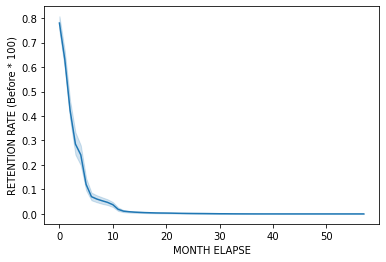

In [1078]:
sns.lineplot(x = "MONTH", y = "RETENTION RATE" , data = retention_4)
plt.xlabel("MONTH ELAPSE")
plt.ylabel("RETENTION RATE (Before * 100)") # Cumulative retention Curve

Text(0, 0.5, 'RETENTION RATE (Before * 100)')

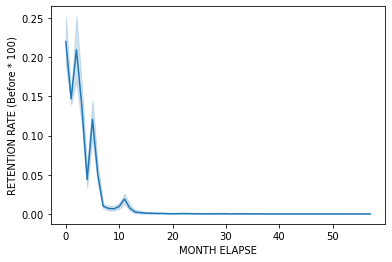

In [1089]:
retention_5 = retention_1.copy()

for i in range(1, retention_5.shape[1]):
    retention_5.iloc[:, i] = retention_1.iloc[:, i].fillna(0).astype(int) / retention_1['TOTAL_MEMBER'].astype(int)
    
retention_5.drop("TOTAL_MEMBER", axis=1, inplace = True)

retention_6 = pd.melt(retention_5, id_vars=['COHORT_GROUP'], \
                              value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 51, 52, 54, 57],\
                      var_name = 'MONTH',value_name='RETENTION RATE')


retention_6 = pd.melt(retention_5, id_vars=['COHORT_GROUP'], \
                              value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 51, 52, 54, 57],\
                      var_name = 'MONTH',value_name='RETENTION RATE')

sns.lineplot(x = "MONTH", y = "RETENTION RATE" , data = retention_6)
plt.xlabel("MONTH ELAPSE")
plt.ylabel("RETENTION RATE (Before * 100)") # Monthly Retention Curve

In [1102]:
### 3. 3.	Please predict Cumulative Retention Curve for 2019 cohorts using previous years’ data. 
### What is the prediction accuracy against the actual curve observed?

retention_7 = retention_3.copy()

mask = retention_7['COHORT_GROUP'].astype(str).str.contains('2019')
retention_2019 = retention_7[mask]


print(retention_2019)


   COHORT_GROUP         0         1         2         3         4         5  \
48      2019-01  0.918325  0.826810  0.713973  0.619068  0.573256  0.444457   
49      2019-02  0.917884  0.798181  0.654537  0.515442  0.464209  0.336605   
50      2019-03  0.906014  0.781651  0.650357  0.501529  0.450765  0.277064   
51      2019-04  0.907438  0.801483  0.662043  0.537670  0.474288  0.358527   
52      2019-05  0.919730  0.806831  0.667609  0.528388  0.469437  0.252121   
53      2019-06  0.911637  0.800757  0.667550  0.551183  0.488742  0.326395   
54      2019-07  0.899660  0.777589  0.655707  0.544218  0.472789  0.229025   
55      2019-08  0.892035  0.761770  0.606018  0.504779  0.398938  0.185133   
56      2019-09  0.899007  0.762624  0.600993  0.444325  0.332542  0.000000   
57      2019-10  0.903044  0.791101  0.582904  0.411241  0.000000  0.000000   
58      2019-11  0.921955  0.780448  0.593573  0.000000  0.000000  0.000000   
59      2019-12  0.933672  0.771082  0.000000  0.000

<AxesSubplot:xlabel='MONTH', ylabel='RETENTION RATE'>

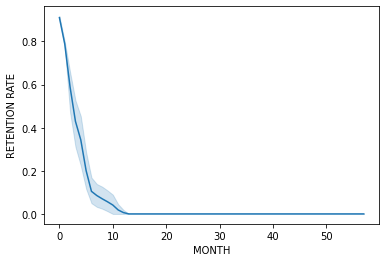

In [1108]:
retention_7 = retention_3.copy()

mask = retention_7['COHORT_GROUP'].astype(str).str.contains('2019')
retention_2019 = retention_7[mask]

retention_2019 = pd.melt(retention_2019, id_vars=['COHORT_GROUP'], \
                              value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 49, 51, 52, 54, 57],\
                      var_name = 'MONTH',value_name='RETENTION RATE')

sns.lineplot(x = "MONTH", y = "RETENTION RATE" , data = retention_2019)

In [1117]:
""" #3 My Answer : Based on the line plot of the retention rates for the 2019 cohort group, 
It appears that the retention rates follow a similar trend as previous years' cohort groups.
I can use this information to predict the cumulative retention curve for the 2019 cohort group using previous years' data. 
However, I believe that the prediction accuracy against the actual curve observed 
cannot be determined without comparing the predicted curve with the actual curve and calculating the prediction error. """

" #3 My Answer : Based on the line plot of the retention rates for the 2019 cohort group, \nIt appears that the retention rates follow a similar trend as previous years' cohort groups.\nI can use this information to predict the cumulative retention curve for the 2019 cohort group using previous years' data. \nHowever, I believe that the prediction accuracy against the actual curve observed \ncannot be determined without comparing the predicted curve with the actual curve and calculating the prediction error. "

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303235 entries, 0 to 303234
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   POLICY_NUMBER              303235 non-null  int64         
 1   START_MONTH                303235 non-null  int64         
 2   MEMBERS                    303235 non-null  int64         
 3   MAX_DURATION               303235 non-null  int64         
 4   STATE                      303235 non-null  object        
 5   CARRIER_NAME               303235 non-null  object        
 6   END_MONTH                  303235 non-null  int64         
 7   START_DATE                 303235 non-null  datetime64[ns]
 8   CHURN_DATE                 303235 non-null  datetime64[ns]
 9   TENURE_DATE                303235 non-null  int64         
 10  START_YEAR                 303235 non-null  int64         
 11  TERMINATED BEFORE MAX_DUR  303235 non-null  object  